Stock Prediction Method

In [1]:
import time, datetime, talib
from datetime import date

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

from pandas import DataFrame
from pandas import datetime
from numpy.linalg import LinAlgError

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

import warnings
warnings.filterwarnings("ignore")

C:\Users\Elid-PC.DESKTOP-MG9DS93\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\Elid-PC.DESKTOP-MG9DS93\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':
Using TensorFlow backend.


In [2]:
#load data

data = pd.DataFrame()
end_date = '2020-04-19'
start_date = '2017-04-20'
Date = pd.DataFrame(pdr.DataReader( 'AAPL','yahoo', start_date, end_date))
data = pd.DataFrame({'Date': Date.index})
# DJIA
for ticker in ['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','GS','HD','IBM',
               'INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE',
               'PFE','PG','TRV','UNH','V','VZ','WBA','WMT','XOM']:

    #Downloads data from Yahoo
    data[ticker] = pdr.DataReader( ticker,'yahoo', start_date, end_date)['Adj Close'].values

assets = data.columns.values[1:].tolist()
data = data.iloc[:, 1:]
data

AAPL        AXP          BA         CAT       CSCO        CVX  \
0    134.286041  72.179878  166.825119   85.629616  29.766371  92.560600   
1    135.966064  76.450485  167.666733   87.440125  29.930477  93.137810   
2    135.803802  76.039658  168.676666   87.126053  29.921356  93.146706   
3    137.111542  76.861290  170.247665   89.426132  30.340729  94.070259   
4    137.961105  77.033264  171.603577   96.455704  30.468363  94.780701   
..          ...        ...         ...         ...        ...        ...   
750  272.512329  90.330002  147.330002  113.101631  41.220001  84.910004   
751  286.275055  88.389999  141.000000  115.420349  42.779999  84.610001   
752  283.662140  83.790001  145.979996  110.515373  41.520000  82.489998   
753  285.916046  81.349998  134.240005  112.190002  41.500000  79.989998   
754  282.036530  87.389999  154.000000  116.300003  42.480000  87.169998   

            DIS          GS          HD         IBM  ...        NKE  \
0    108.910156  203.630295  136.910797  139.869034  ...  53.955559   
1    109.925232  207.406311  138.305771  140.396698  ...  54.477150   
2    109.590057  206.264938  139.496094  138.735840  ...  53.945892   
3    108.881424  212.314224  141.253784  139.055923  ...  53.578861   
4    110.298706  215.557632  142.313934  138.744492  ...  53.559536   
..          ...         ...         ...         ...  ...        ...   
750  103.500000  179.179993  198.789993  119.546738  ...  84.459999   
751  106.029999  178.229996  207.169998  122.270210  ...  87.470001   
752  103.370003  178.520004  198.479996  117.119293  ...  85.040001   
753  102.019997  177.039993  199.850006  114.198463  ...  86.300003   
754  106.629997  183.490005  209.419998  118.530365  ...  89.910004   

           PFE          PG         TRV         UNH           V         VZ  \
0    29.806793   81.869896  112.267334  161.678497   87.857697  42.809406   
1    29.922085   81.623192  110.849998  163.866028   89.228195  42.345787   
2    29.833403   80.974426  111.055161  163.503067   89.228195  41.331104   
3    29.922085   81.824203  112.425858  164.620682   89.913429  41.156147   
4    29.939817   82.235382  113.125198  166.254181   90.167946  40.849995   
..         ...         ...         ...         ...         ...        ...   
750  34.793255  115.181847  106.419998  263.510010  168.707520  56.669998   
751  36.080425  120.158661  108.019997  270.500000  174.328094  58.139999   
752  35.615067  120.416939  102.169998  281.679993  165.682587  56.930000   
753  35.525955  120.695084   99.809998  298.429993  162.148499  57.660000   
754  36.545788  123.863953  105.070000  290.559998  169.256592  58.459999   

           WBA         WMT        XOM  
0    77.198357   69.027283  69.340416  
1    77.780746   69.707596  69.788391  
2    77.679047   69.838051  69.512695  
3    77.910156   69.688957  69.874535  
4    79.426201   69.940567  70.408638  
..         ...         ...        ...  
750  44.110001  124.751244  41.946678  
751  46.380001  128.435028  41.622959  
752  43.439999  128.196075  39.710049  
753  43.230000  131.750458  38.405346  
754  44.500000  131.541367  42.397934  

[755 rows x 28 columns]

In [3]:
def get_prediction_model(x):
    
    newDF = []
    newDF = pd.DataFrame({x : data[x]})
    # Moving Average
    newDF['ma5'] = talib.MA(newDF[x], timeperiod = 5)
    newDF['ma20'] = talib.MA(newDF[x], timeperiod = 20)
    
     # Double Exponential Moving Average
    newDF['ema5'] = talib.EMA(newDF[x], timeperiod=5)
    newDF['ema20'] = talib.EMA(newDF[x], timeperiod=20)
    
    # Double Exponential Moving Average
    newDF['dema5'] = talib.DEMA(newDF[x], timeperiod=5)
    newDF['dema20'] = talib.DEMA(newDF[x], timeperiod=20)
   
    # Triple Exponential Moving Average
    newDF['tema5'] = talib.TEMA(newDF[x], timeperiod=5)
    newDF['tema20'] = talib.TEMA(newDF[x], timeperiod=20)
    
    # Trianglar Moving Average
    newDF['trima5'] = talib.TRIMA(newDF[x], timeperiod=5)
    newDF['trim20'] = talib.TRIMA(newDF[x], timeperiod=20)        
    
    # Kaufman Adaptive Moving Average
    newDF['kama5'] = talib.KAMA(newDF[x], timeperiod=5)
    newDF['kama20'] = talib.KAMA(newDF[x], timeperiod=20)  
    
    # Weighted Moving Average
    newDF['wma5'] = talib.WMA(newDF[x], timeperiod=5)
    newDF['wma20']= talib.WMA(newDF[x], timeperiod=20)
    
    # Create FFT for 5, 25, 50, 100 Components
    fftdf = []
    closefft = np.fft.fft(np.asarray(newDF[x].tolist()))
    fftdf = pd.DataFrame({'fft':closefft})
    fftdf['absolute'] = fftdf['fft'].apply(lambda x: np.abs(x))
    fftdf['angle'] = fftdf['fft'].apply(lambda x: np.angle(x))
    fftlist = np.asarray(fftdf['fft'].tolist())
    for num in [5, 25, 50, 100]:
        fftlistm10= np.copy(fftlist); fftlistm10[num:-num]=0
        newDF['FT_' + str(num) + '_cmp']= np.abs(np.fft.ifft(fftlistm10))
    
    # Creat ARIMA Model
    series = []
    series = newDF[x]
    auto_arima = pm.auto_arima(series, start_p=0, start_q=0,
                               test='adf',       # use adftest to find optimal 'd'
                               max_p=20, max_q=20, # maximum p and q
                               m=1,              # frequency of series
                               d=None,           # let model determine 'd'
                               seasonal=False,   # No Seasonality
                               start_P=0, 
                               D=0, 
                               trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    order_ = auto_arima.order

    try:
        model = ARIMA(series, order=order_) # use the optimal values for p, d, q
        modelfit = model.fit(disp=0) 
    except:
        model = ARIMA(series, order=(5,1,0)) # Assumption for order if error raise  
        modelfit = model.fit(disp=0)
    
    # print(modelfit.summary())
    X = series.values
    size = int(len(X) * 0.8)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        try: 
            model = ARIMA(history, order=order_)
            modelfit = model.fit(disp=0)
        except:
            model = ARIMA(series, order=(5,1,0)) # Assumption for order if error raise 
            modelfit = model.fit(disp=0)
        output = modelfit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    
    tr = []
    for i in range(len(train)):
        tr = tr + [train[i]]

    pred = []
    for i in range(len(predictions)):
        pred = pred + [predictions[i][0]]
    
    newDF['ARIMA'] = tr + pred
    
    # Evaluation for RMS to select for the Best Prediction Model
    newDF2 = newDF.tail(252) # Based on past 1 yr performance
    rms_old = np.sqrt(np.mean(np.power((np.array(newDF2[newDF2.columns[0]])
                                        -np.array(newDF2[newDF2.columns[1]])),2)))
    for columns in newDF2.columns[2:]:

        rms_new = np.sqrt(np.mean(np.power((np.array(newDF2[newDF2.columns[0]])-np.array(newDF2[columns])),2)))
        if rms_new < rms_old:
            rms_old = rms_new
            Best_Prediction_Model = columns
    
    return newDF2, Best_Prediction_Model

In [4]:
Best_Prediction_Model_Ticker = []
for ticker in data.columns:
    Results, Best_Prediction_Model = get_prediction_model(ticker)
    print(ticker, Best_Prediction_Model)
    Best_Prediction_Model_Ticker = Best_Prediction_Model_Ticker + [Best_Prediction_Model]  
    

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4378.952, BIC=4388.203, Time=0.037 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4340.192, BIC=4354.068, Time=0.083 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4343.633, BIC=4357.509, Time=0.089 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4378.445, BIC=4383.070, Time=0.016 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=4341.969, BIC=4360.471, Time=0.087 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=4342.008, BIC=4360.510, Time=0.104 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=4341.160, BIC=4364.287, Time=0.439 seconds
Total fit time: 0.859 seconds
AAPL tema5
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3178.099, BIC=3187.350, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3165.065, BIC=3178.941, Time=0.063 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True];

Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=3144.957, BIC=3163.459, Time=0.081 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=3144.964, BIC=3163.466, Time=0.150 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=3142.548, BIC=3165.675, Time=0.370 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=3138.866, BIC=3166.618, Time=0.212 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=3137.542, BIC=3160.669, Time=0.091 seconds
Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=3138.729, BIC=3166.481, Time=0.156 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=3140.710, BIC=3173.088, Time=0.538 seconds
Total fit time: 1.781 seconds
DIS tema5
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4196.591, BIC=4205.842, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4185.375, BIC=4199.251, Time=0.063 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4187.769, BIC=4201.645, Time=0.085 secon

Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=3078.224, BIC=3105.984, Time=0.675 seconds
Total fit time: 2.558 seconds
JNJ tema5
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3143.744, BIC=3152.995, Time=0.026 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3110.415, BIC=3124.292, Time=0.062 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3118.576, BIC=3132.452, Time=0.069 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3141.849, BIC=3146.475, Time=0.016 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=3100.944, BIC=3119.445, Time=0.087 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=3097.662, BIC=3120.789, Time=0.082 seconds
Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=3082.912, BIC=3110.664, Time=0.132 seconds
Fit ARIMA(5,1,0)x(0,0,0,0) [intercept=True]; AIC=3083.558, BIC=3115.936, Time=0.153 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=3054.138, BIC=3086.516, Time=0.398 seco

Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3672.088, BIC=3685.964, Time=0.106 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3691.961, BIC=3696.587, Time=0.019 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=3666.480, BIC=3684.981, Time=0.106 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=3664.551, BIC=3687.678, Time=0.177 seconds
Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=3666.542, BIC=3694.294, Time=0.158 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=3666.537, BIC=3694.290, Time=0.333 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=3665.932, BIC=3689.059, Time=0.269 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=3668.509, BIC=3700.887, Time=0.336 seconds
Total fit time: 1.605 seconds
MCD tema5
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3788.301, BIC=3797.551, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3789.760, BIC=3803.636, Time=0.063 seco

Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=3133.946, BIC=3152.448, Time=0.108 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=3132.707, BIC=3155.834, Time=0.076 seconds
Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=3116.622, BIC=3144.374, Time=0.182 seconds
Fit ARIMA(5,1,0)x(0,0,0,0) [intercept=True]; AIC=3115.649, BIC=3148.027, Time=0.185 seconds
Fit ARIMA(6,1,0)x(0,0,0,0) [intercept=True]; AIC=3115.475, BIC=3152.478, Time=0.263 seconds
Fit ARIMA(7,1,0)x(0,0,0,0) [intercept=True]; AIC=3113.483, BIC=3155.112, Time=0.278 seconds
Fit ARIMA(8,1,0)x(0,0,0,0) [intercept=True]; AIC=3108.525, BIC=3154.779, Time=0.329 seconds
Fit ARIMA(9,1,0)x(0,0,0,0) [intercept=True]; AIC=3110.041, BIC=3160.920, Time=0.370 seconds
Fit ARIMA(8,1,1)x(0,0,0,0) [intercept=True]; AIC=3109.345, BIC=3160.224, Time=0.960 seconds
Fit ARIMA(7,1,1)x(0,0,0,0) [intercept=True]; AIC=3108.914, BIC=3155.168, Time=0.692 seconds
Fit ARIMA(9,1,1)x(0,0,0,0) [intercept=True]; AIC=3111.328, BIC=3166.832, Time=1.

XOM tema5


In [5]:
Best_Prediction_Model_Ticker[0]

'tema5'

In [6]:
Results, Best_Prediction_Model = get_prediction_model('AAPL')

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4378.952, BIC=4388.203, Time=0.026 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4340.192, BIC=4354.068, Time=0.079 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4343.633, BIC=4357.509, Time=0.086 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4378.445, BIC=4383.070, Time=0.018 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=4341.969, BIC=4360.471, Time=0.090 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=4342.008, BIC=4360.510, Time=0.132 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=4341.160, BIC=4364.287, Time=0.520 seconds
Total fit time: 0.972 seconds


In [7]:
len(Results.columns)

20

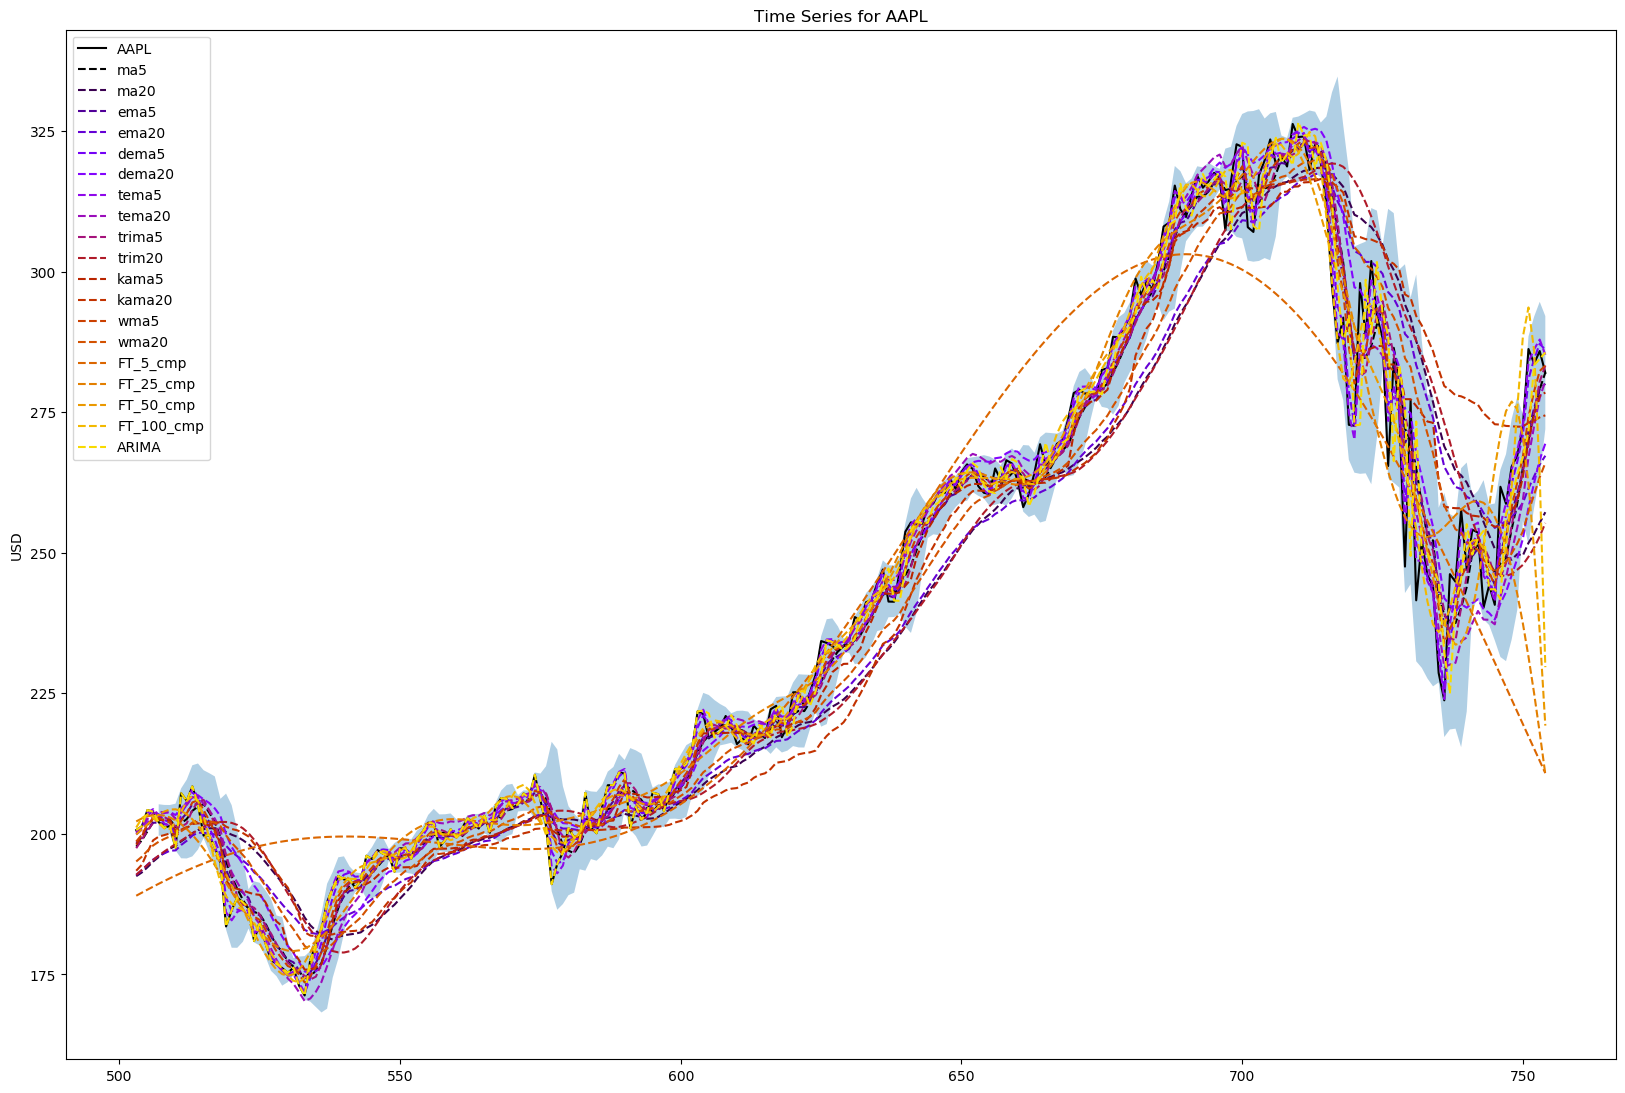

In [8]:
import matplotlib


# Line style & Color Range from 
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(Results.columns))]

def plot_Time_Series(dataset, last_days):
    # Define the band
    upperband, middleband, lowerband = talib.BBANDS(dataset[dataset.columns[0]], 
                                                timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

    plt.figure(figsize=(20, 30), dpi=100)
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    count = 0
    plt.plot(dataset[str(dataset.columns[0])],label=str(dataset.columns[0]), 
             color='Black',linestyle='-')
    for columns in dataset.columns[1:]:
        plt.plot(dataset[str(columns)],label=str(columns), color=colors[count],linestyle='--')
        count += 1
    
    plt.fill_between(x_,lowerband, upperband, alpha=0.35)
    plt.title('Time Series for ' + dataset.columns[0])
    plt.ylabel('USD')
    plt.legend()

    plt.legend()
    plt.show()

plot_Time_Series(Results, 252)

In [9]:
# Normalize data
scaler = MinMaxScaler([0.2,0.8])
data_X = scaler.fit_transform(data)


# Number of components
N_COMPONENTS = 3

## Autoencoder - Keras
# Network hyperparameters
n_inputs = len(assets)
n_core = N_COMPONENTS
n_outputs = n_inputs

# Create model
input = Input(shape=(n_inputs,))
# Encoder
encoded = Dense(n_core, activation='sigmoid')(input)
# Decoder
decoded = Dense(n_outputs, activation='sigmoid')(encoded)

# define model
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Testing in-sample
X_train = data_X
X_test = data_X

# Training parameters
epochs = 20

# Fit the model
history = autoencoder.fit(X_train,\
                          X_train,\
                          epochs=epochs,\
                          batch_size=1,\
                          shuffle=True,\
                          verbose=1)

# Make AE predictions
y_pred_AE_keras = autoencoder.predict(X_test)

print('test loss: '+str(autoencoder.evaluate(y_pred_AE_keras, X_test)))

Epoch 1/20
755/755 [==============================] - 1s 695us/step - loss: 0.0202
Epoch 2/20
755/755 [==============================] - 0s 625us/step - loss: 0.0166
Epoch 3/20
755/755 [==============================] - 0s 629us/step - loss: 0.0126
Epoch 4/20
755/755 [==============================] - 1s 665us/step - loss: 0.0091
Epoch 5/20
755/755 [==============================] - 1s 678us/step - loss: 0.0074
Epoch 6/20
755/755 [==============================] - 1s 695us/step - loss: 0.0069
Epoch 7/20
755/755 [==============================] - 1s 699us/step - loss: 0.0066
Epoch 8/20
755/755 [==============================] - 1s 695us/step - loss: 0.0064
Epoch 9/20
755/755 [==============================] - 1s 663us/step - loss: 0.0062
Epoch 10/20
755/755 [==============================] - 0s 637us/step - loss: 0.0060
Epoch 11/20
755/755 [==============================] - 1s 683us/step - loss: 0.0058
Epoch 12/20
755/755 [==============================] - 1s 748us/step - loss: 0.0056
E

[6.71530082e-01 1.17031398e-01 6.31310344e-02 4.86235903e-02
 3.16201913e-02 1.60753478e-02 1.04675006e-02 7.30693067e-03
 5.99773076e-03 5.19908440e-03 4.05873600e-03 2.85957736e-03
 2.66801633e-03 2.11943559e-03 1.87672303e-03 1.68322445e-03
 1.45571589e-03 1.21240061e-03 1.12015089e-03 8.00957410e-04
 6.88286346e-04 5.98517156e-04 5.33768930e-04 4.45568288e-04
 3.57733156e-04 2.63973623e-04 1.79668641e-04 9.46561686e-05]


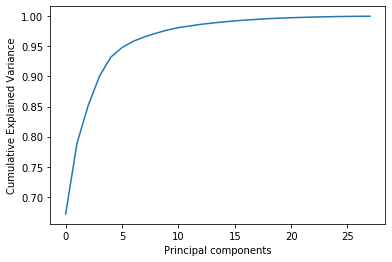

In [10]:
## PCA 
pca = PCA() 
pca.fit(X_train) 
print(pca.explained_variance_ratio_) 
cum_exp_var = np.cumsum(pca.explained_variance_ratio_) 
plt.plot(np.arange(0, 28), cum_exp_var) 
plt.xlabel('Principal components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

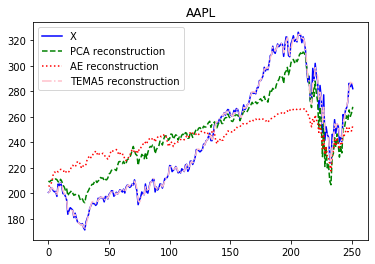

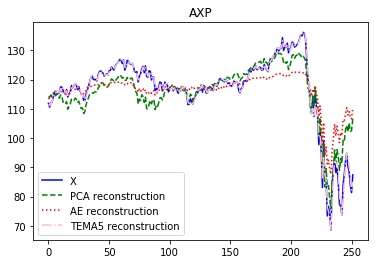

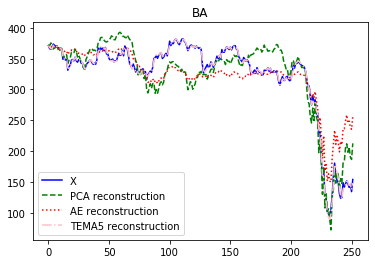

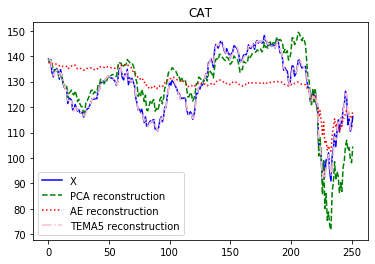

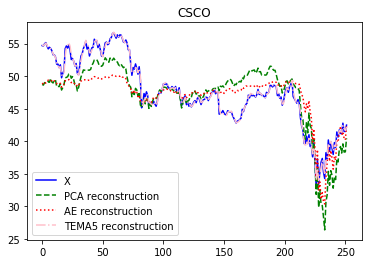

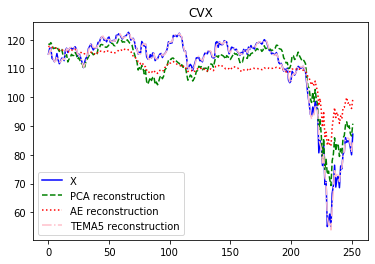

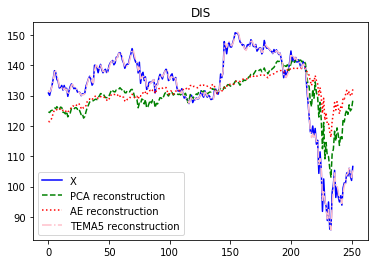

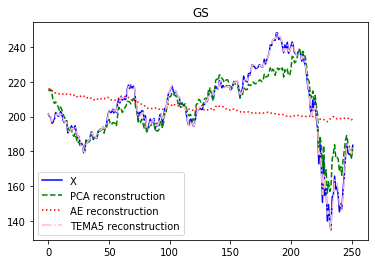

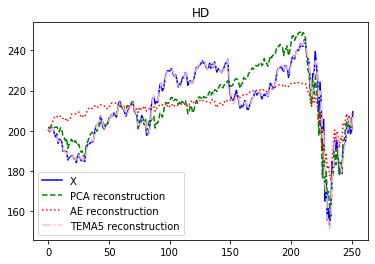

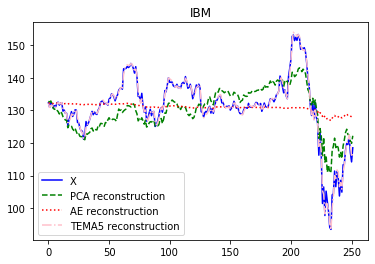

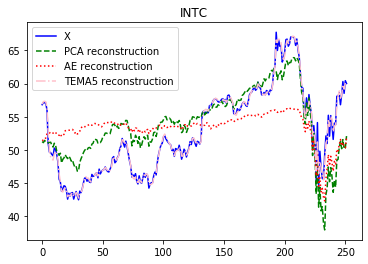

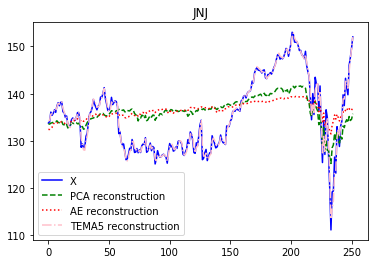

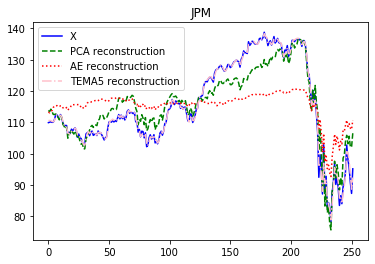

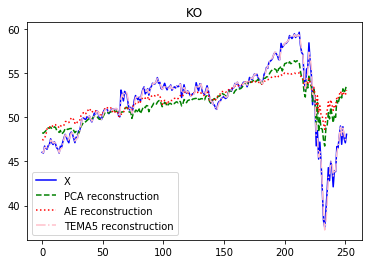

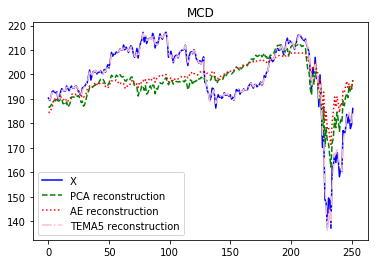

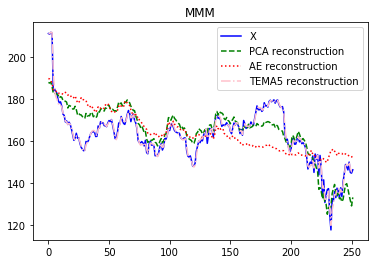

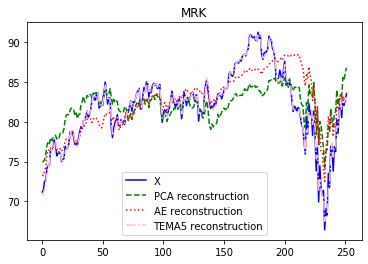

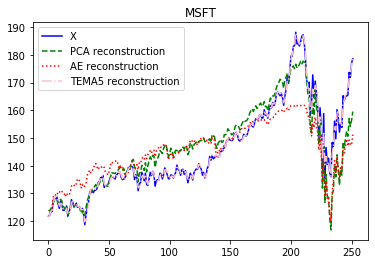

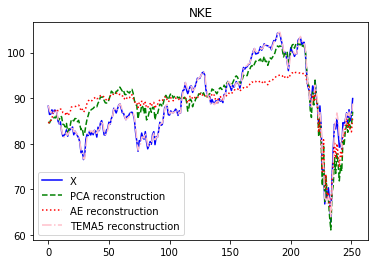

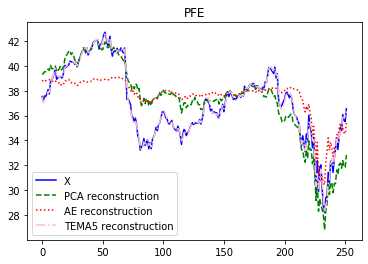

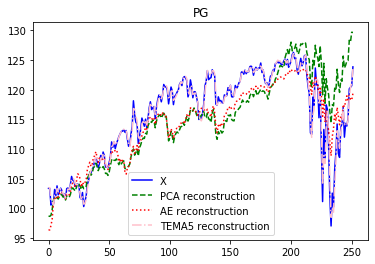

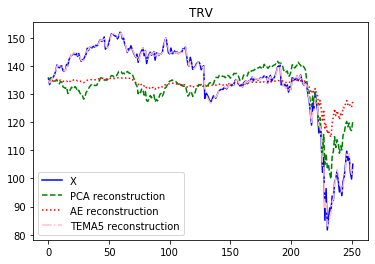

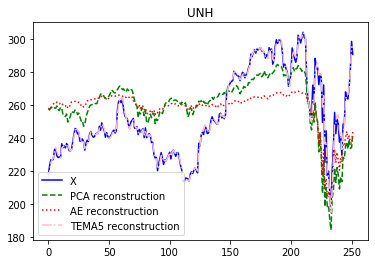

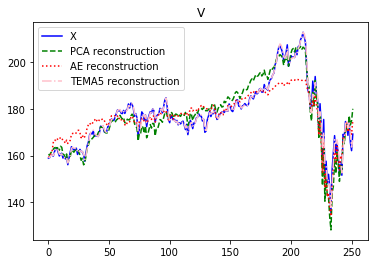

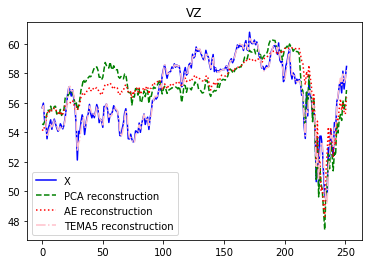

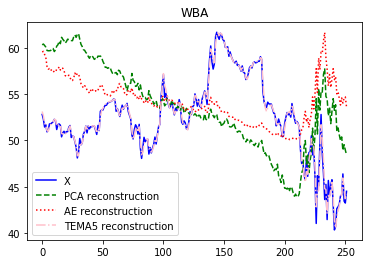

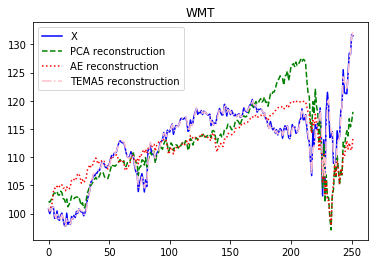

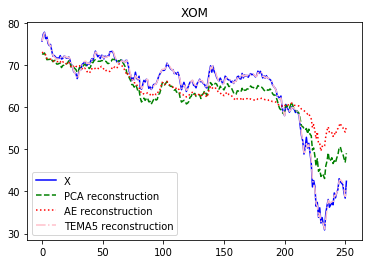

In [11]:
import warnings
warnings.filterwarnings("ignore")

# PCA components are used to reconstruct the time series, just like they are for the autoencoder: 
pca = PCA(n_components = N_COMPONENTS)
pca.fit(X_train) 
y_latent_PCA = pca.transform(X_train) 
y_pred_PCA = pca.inverse_transform(y_latent_PCA)

# Scale Back
X_actual = scaler.inverse_transform(data_X)
PCA_Pred = scaler.inverse_transform(y_pred_PCA)
AE_Pred = scaler.inverse_transform(y_pred_AE_keras)

# DEMA Re-construction
TEMA5 = []
for stk in range(28):
    TEMA = talib.TEMA(X_actual[:,stk], timeperiod=5)
    TEMA5.append(TEMA)
a= []
for i in range(0,len(TEMA5[0])):
    for j in range(0,len(TEMA5)):
        a = a + [TEMA5[j][i]]
TEMA5 = np.reshape(a, (len(TEMA5[0]),len(TEMA5)))
    
#Focus on the last 252 days
total = len(X_train)
X_actual = X_actual[(total-252):total]
PCA_Pred = PCA_Pred[(total-252):total]
AE_Pred = AE_Pred[(total-252):total]
TEMA5 = TEMA5[(total-252):total]

for stk in range(28): 
 
    plt.figure()
    plt.plot(X_actual[: ,stk], label='X',linestyle='-', color ='blue') 
    plt.plot(PCA_Pred[: ,stk], label='PCA reconstruction',linestyle='--', color = 'green') 
    plt.plot(AE_Pred[: ,stk], label='AE reconstruction',linestyle=':', color = 'red')  
    plt.plot(TEMA5[:, stk], label='TEMA5 reconstruction',linestyle='-.', color = 'pink') 
    plt.title(assets[stk]) 
    plt.legend() 
    plt.savefig('Chart/'+assets[stk]+'_series.png', bbox_inches='tight')

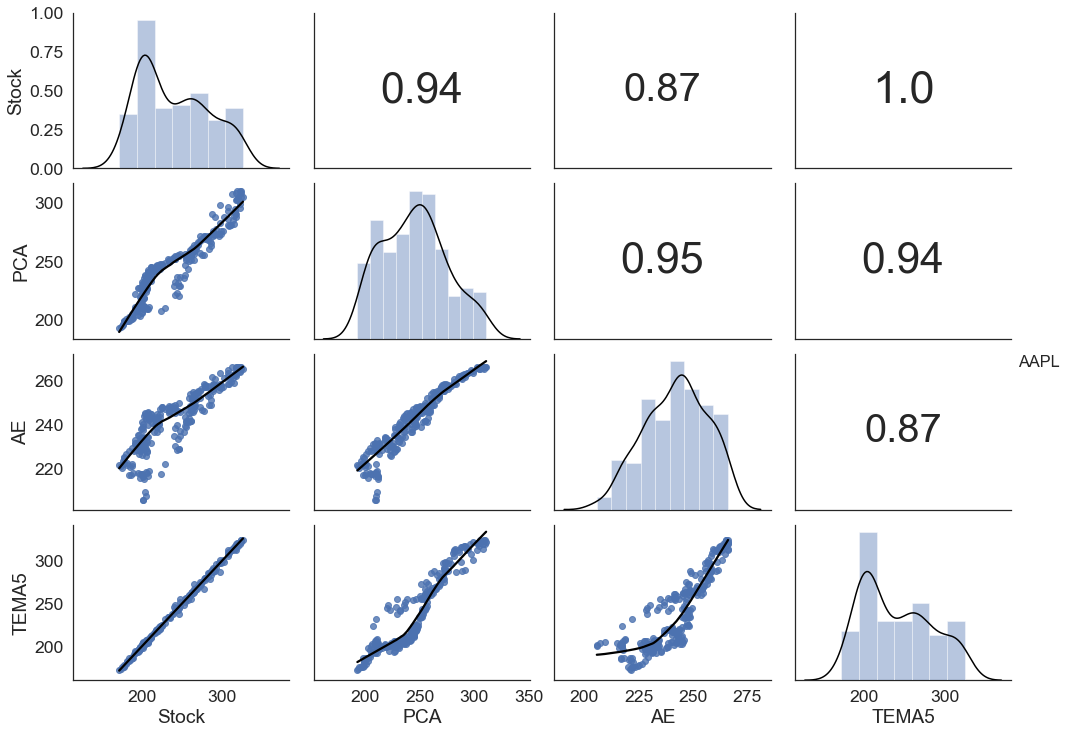

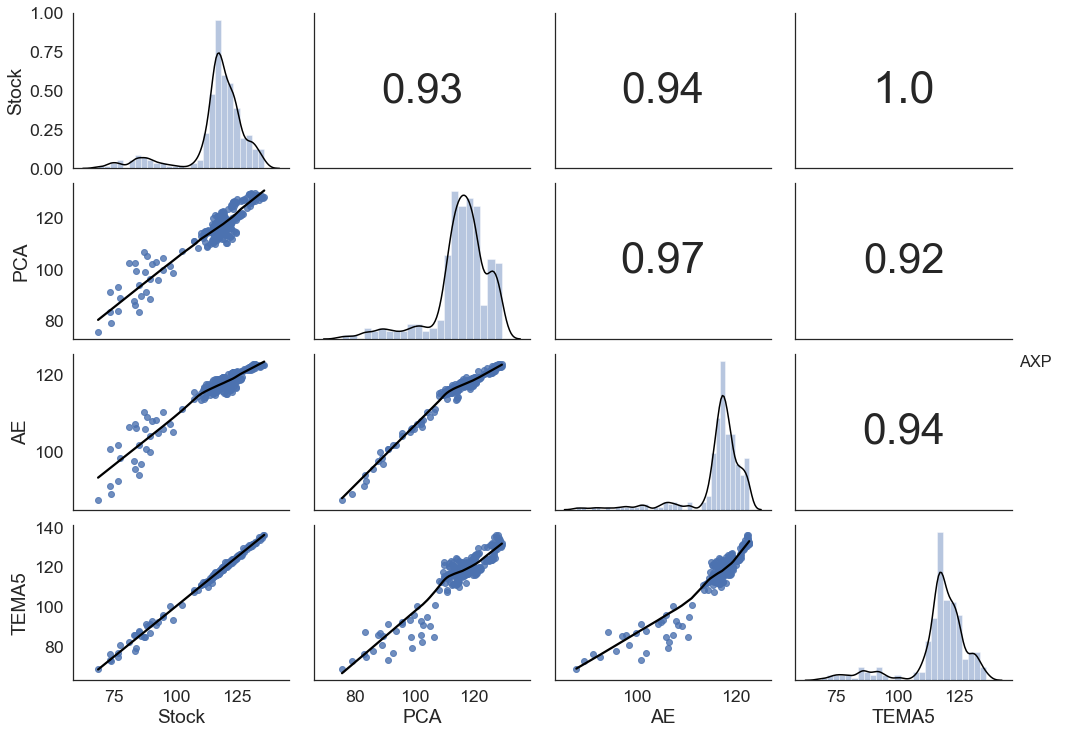

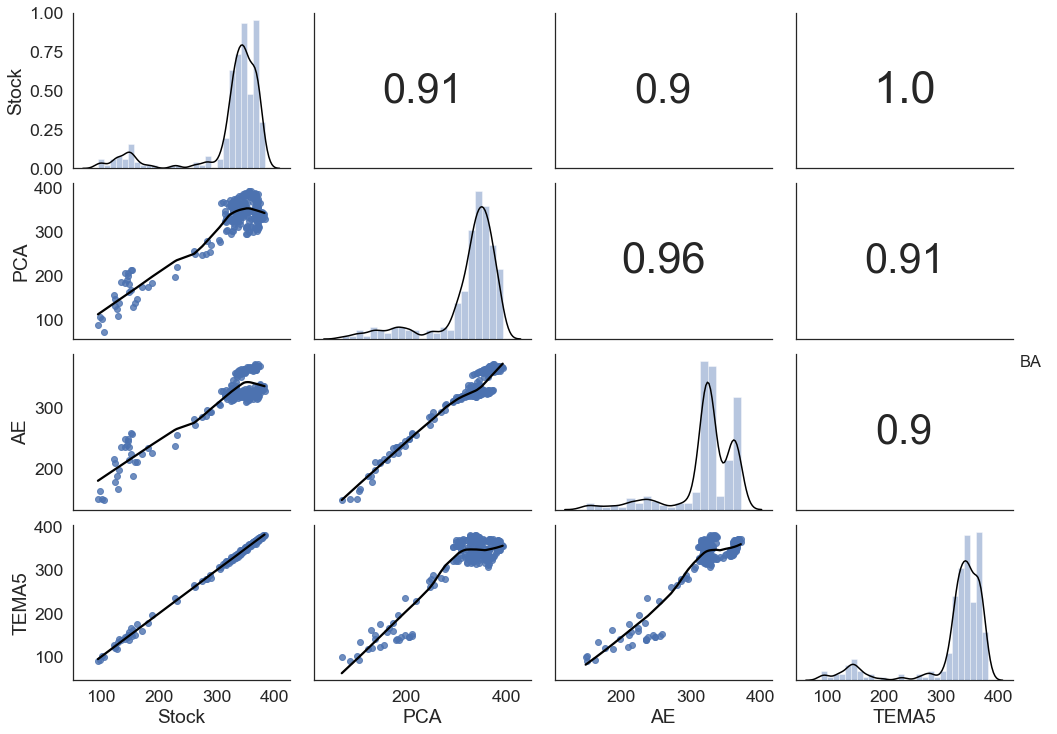

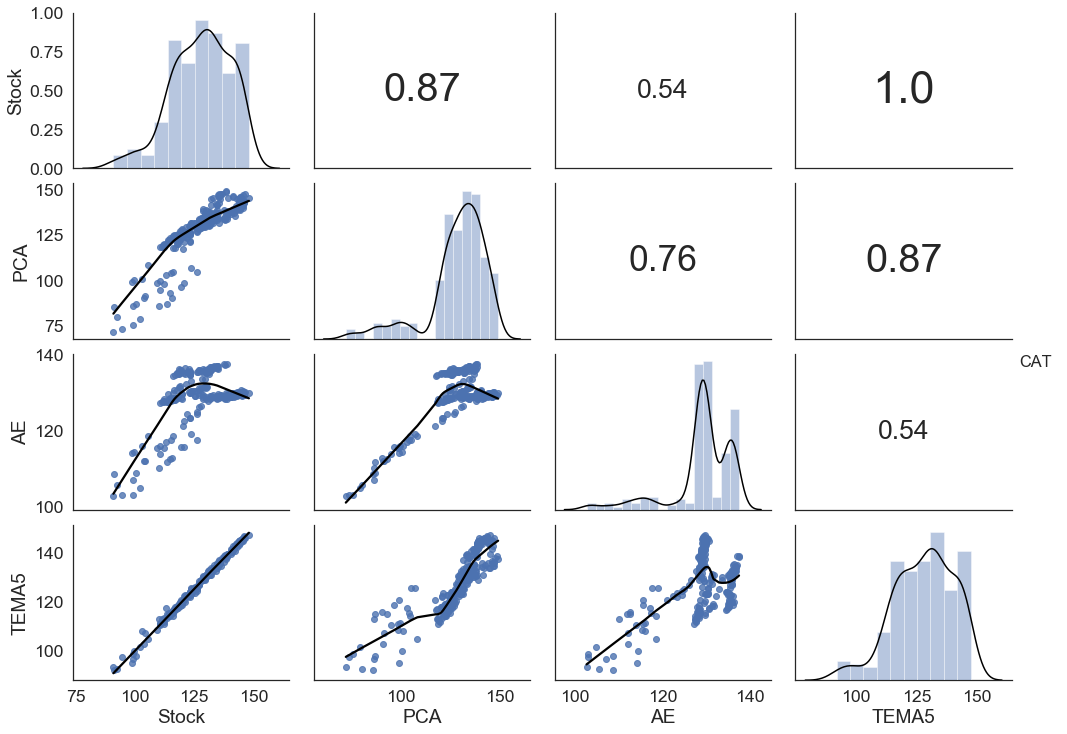

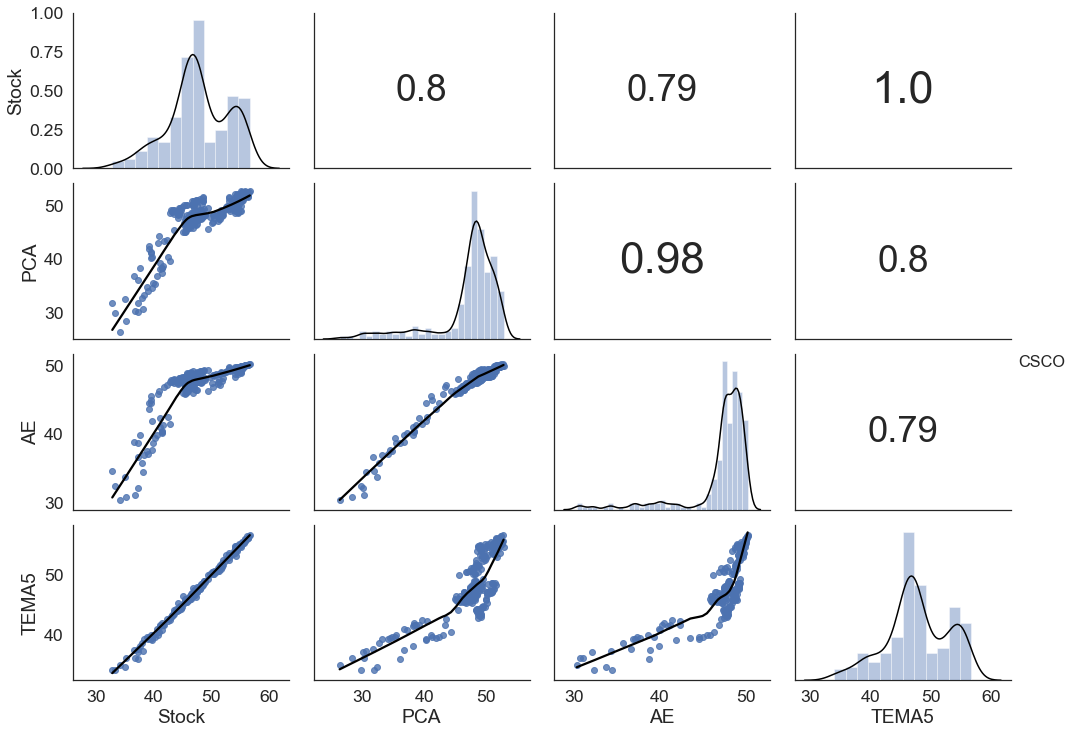

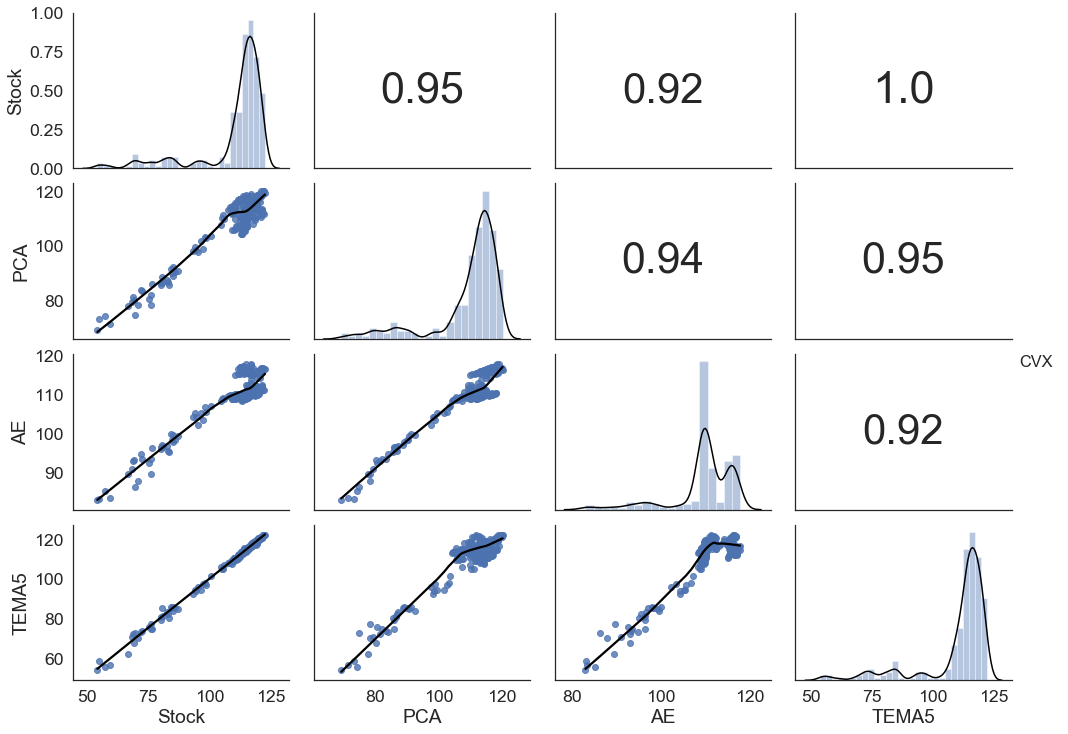

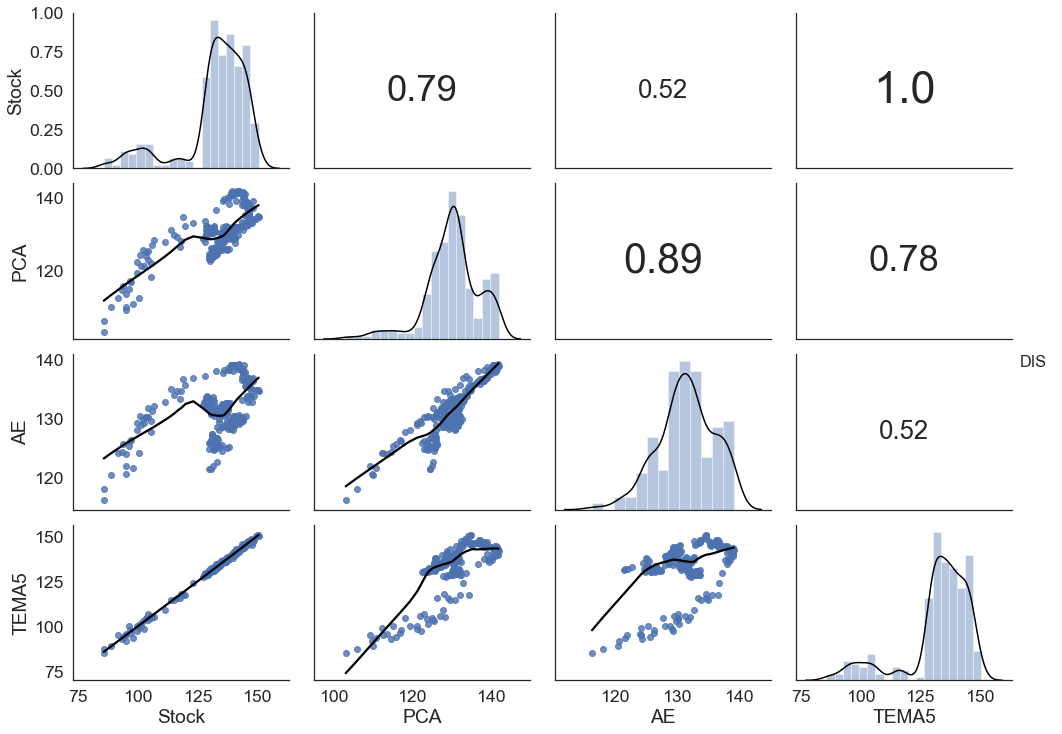

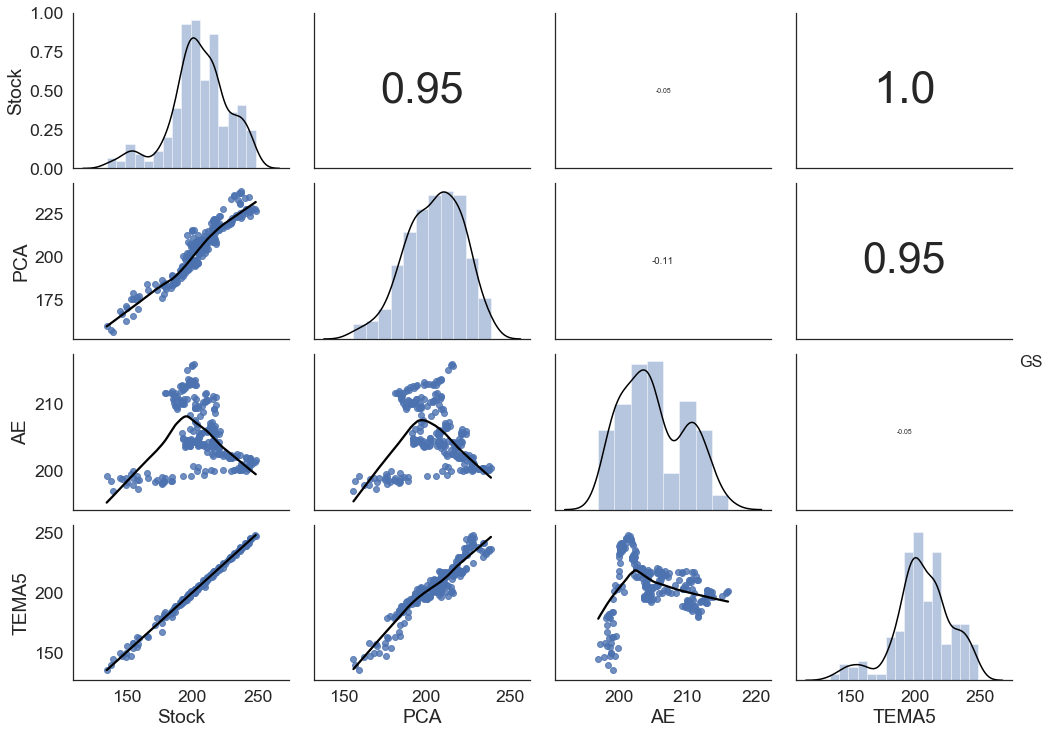

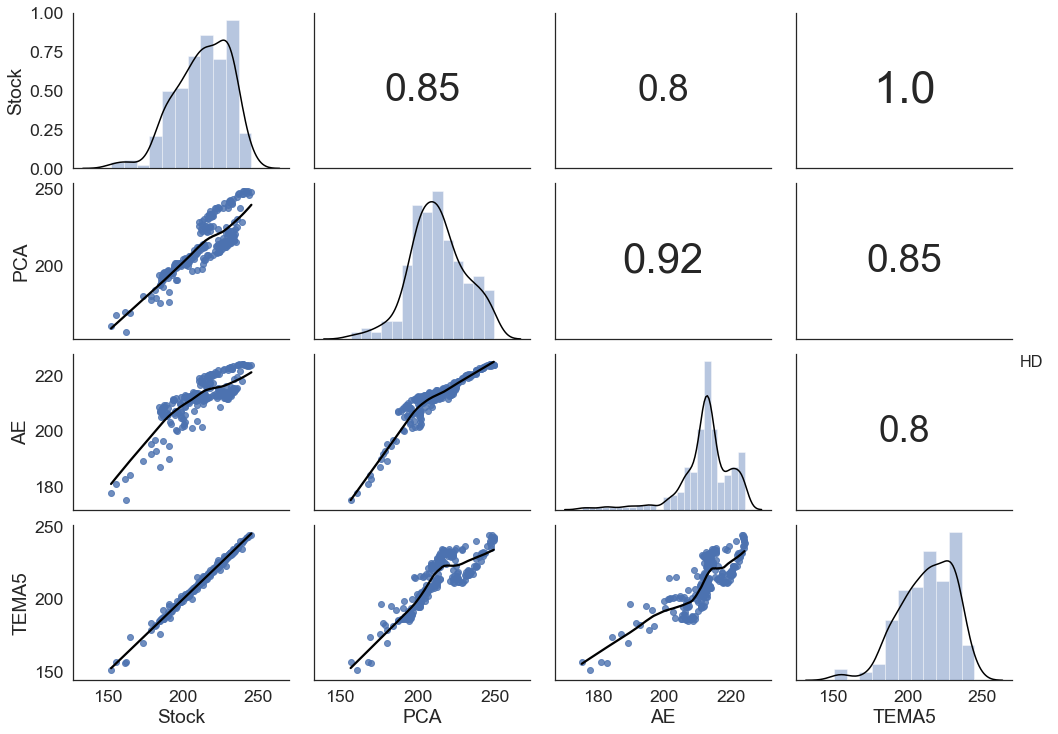

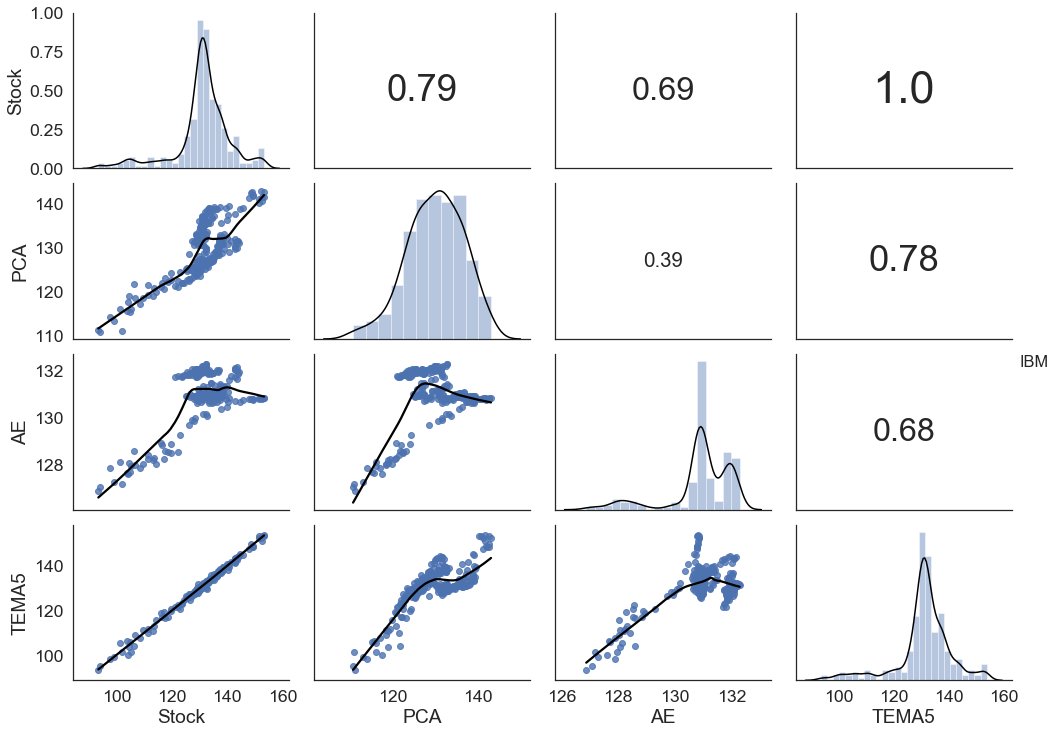

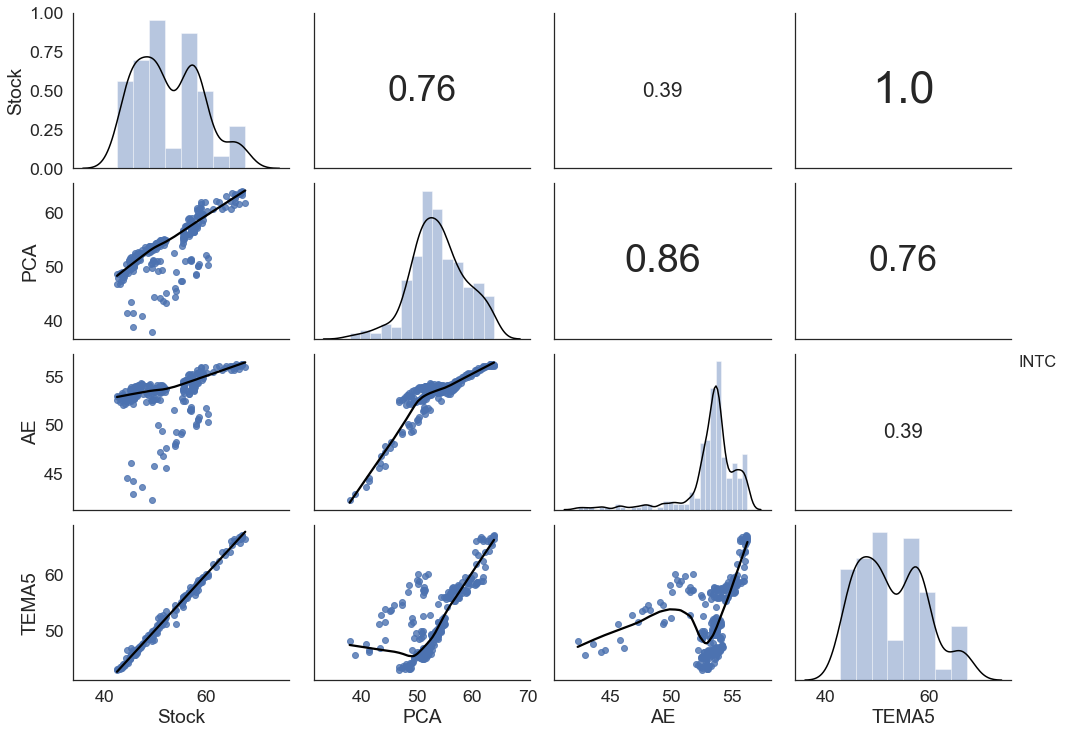

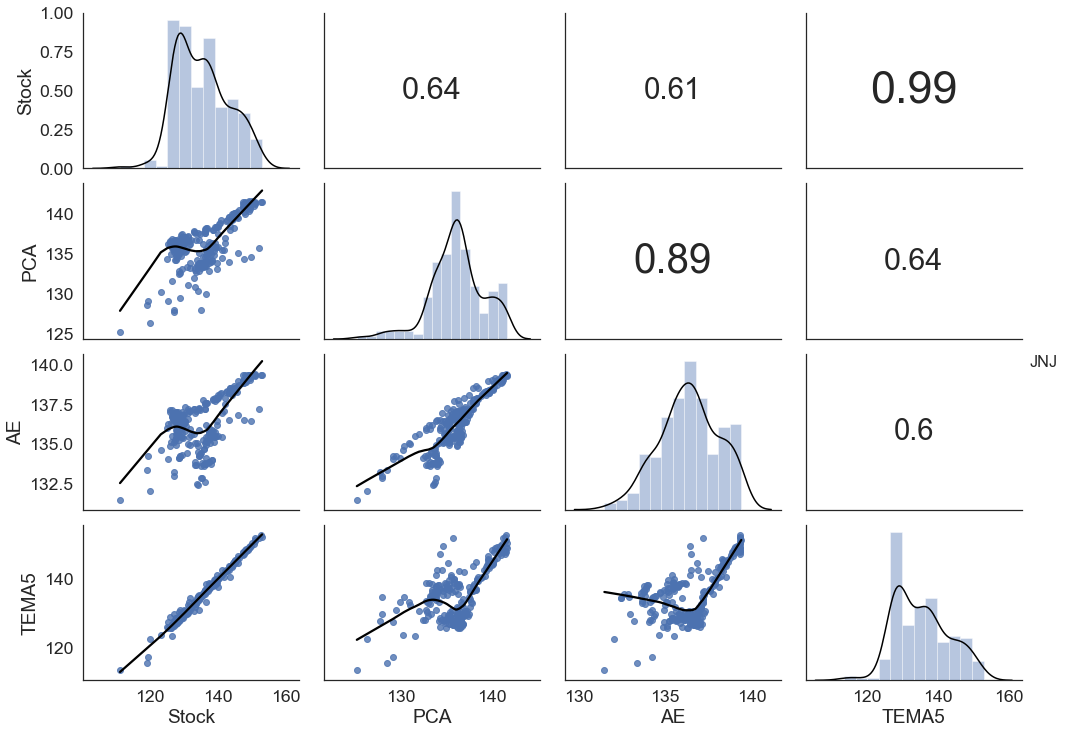

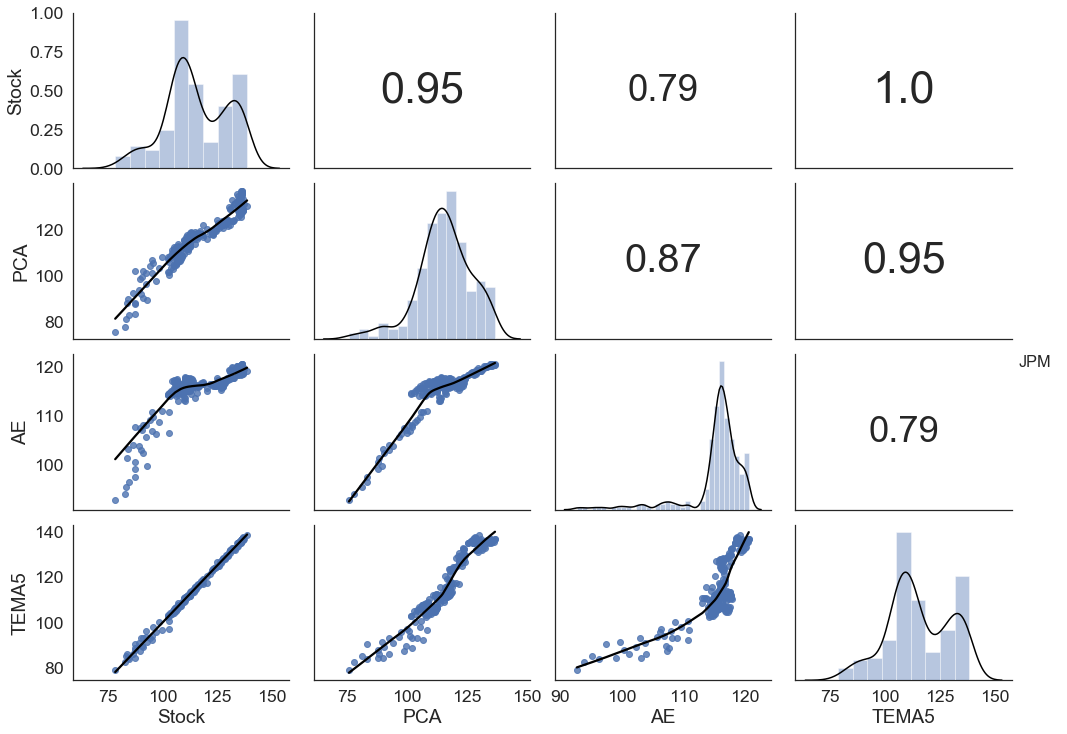

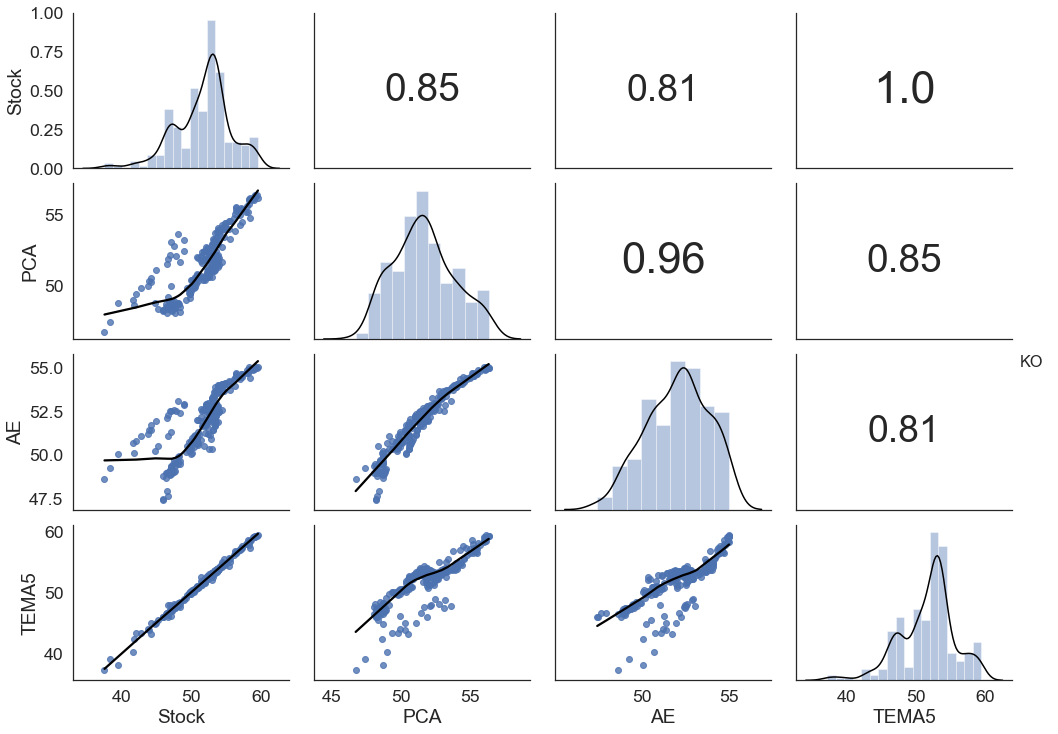

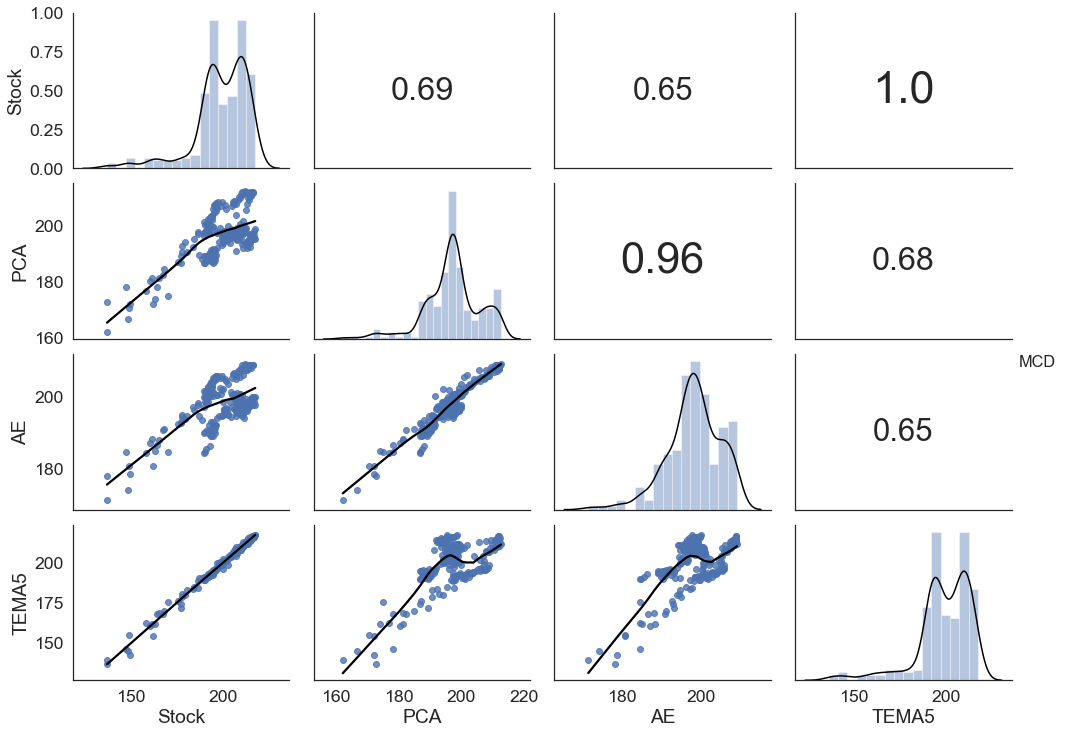

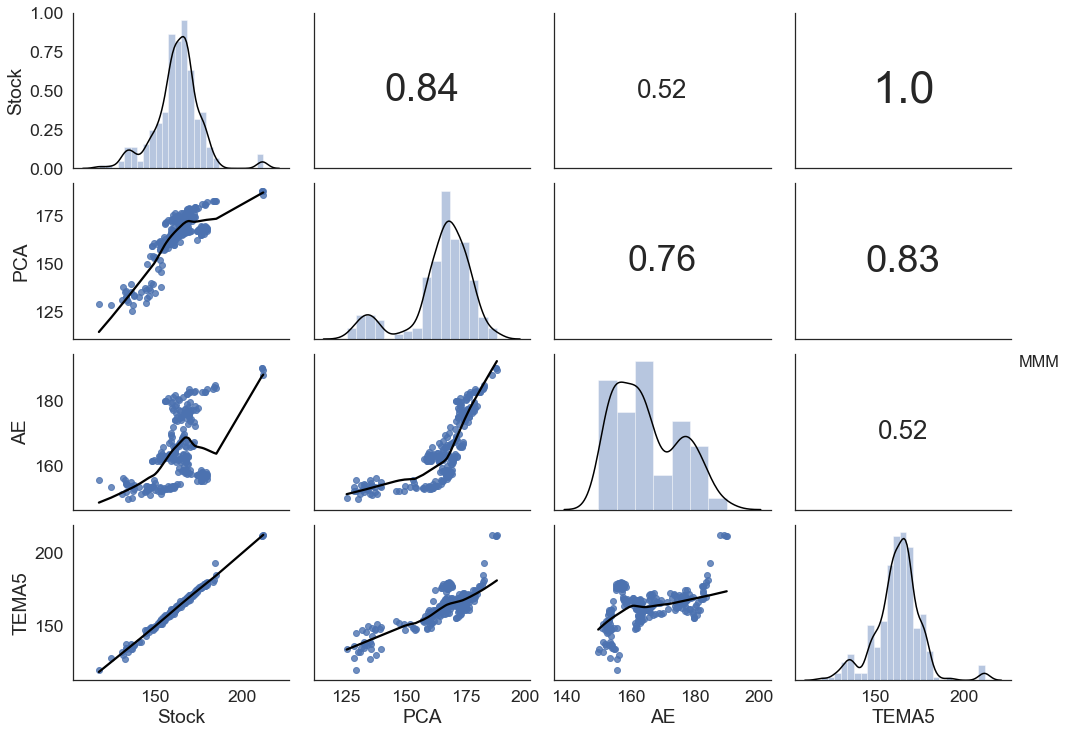

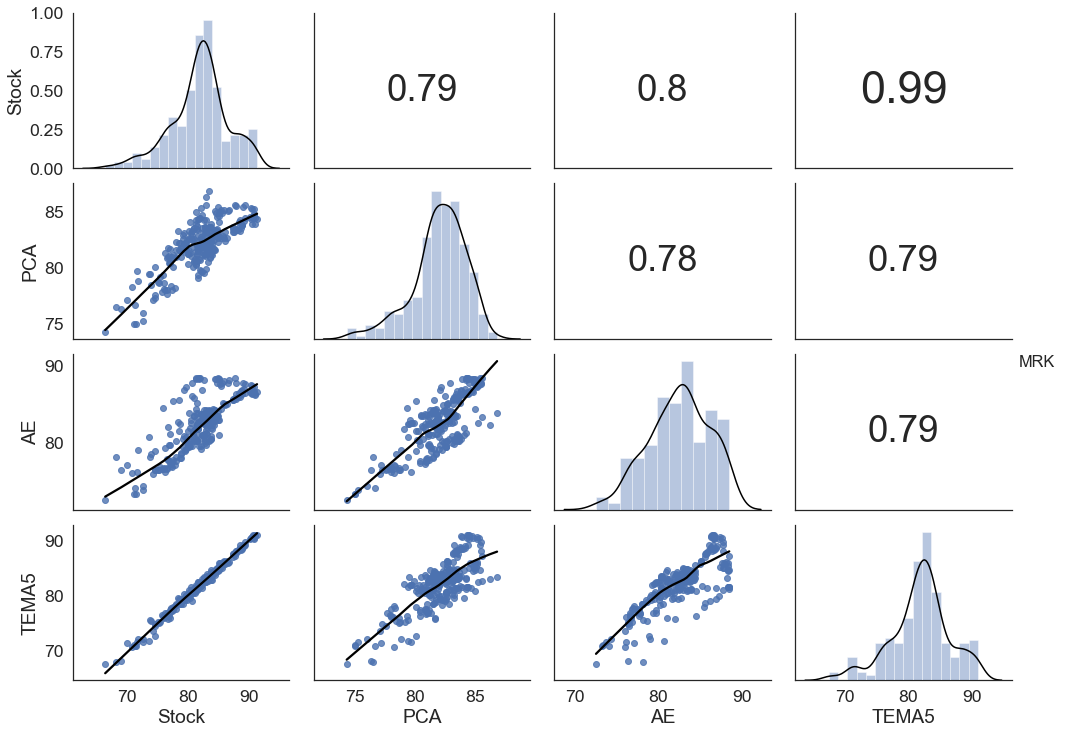

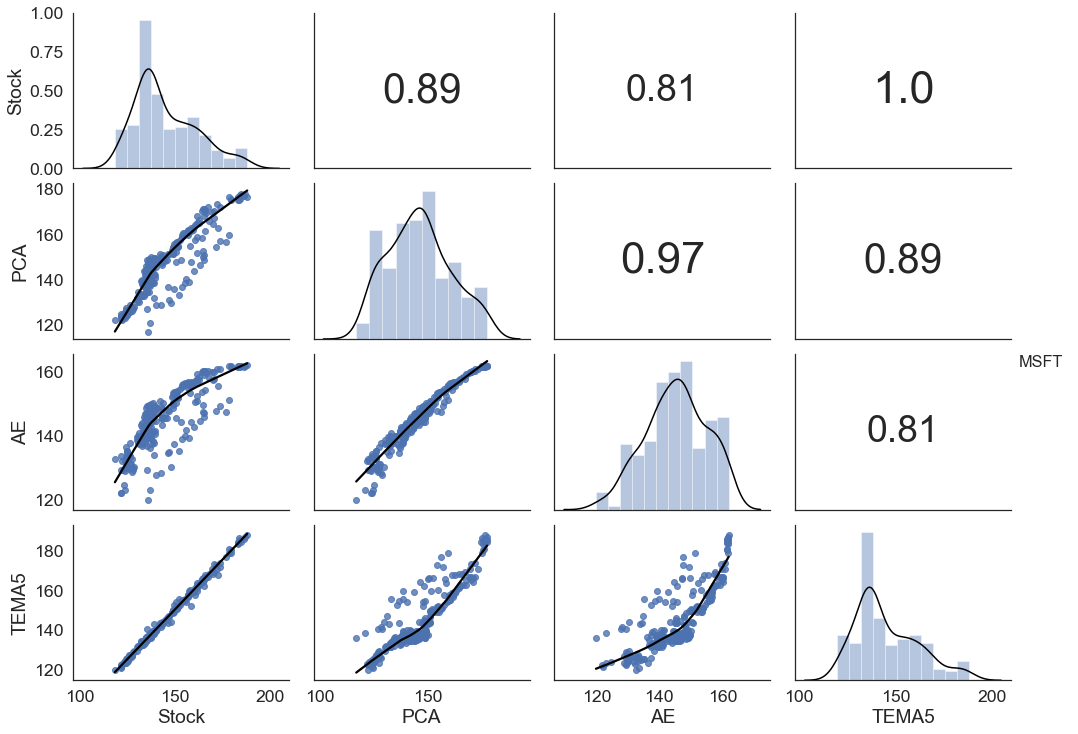

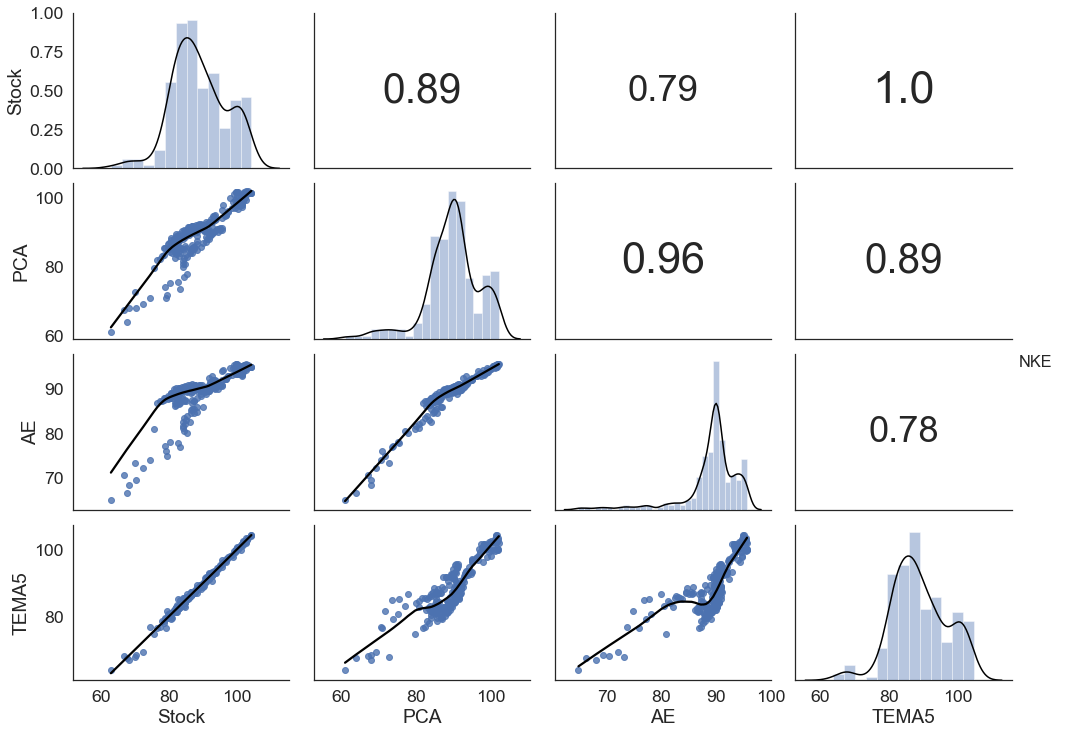

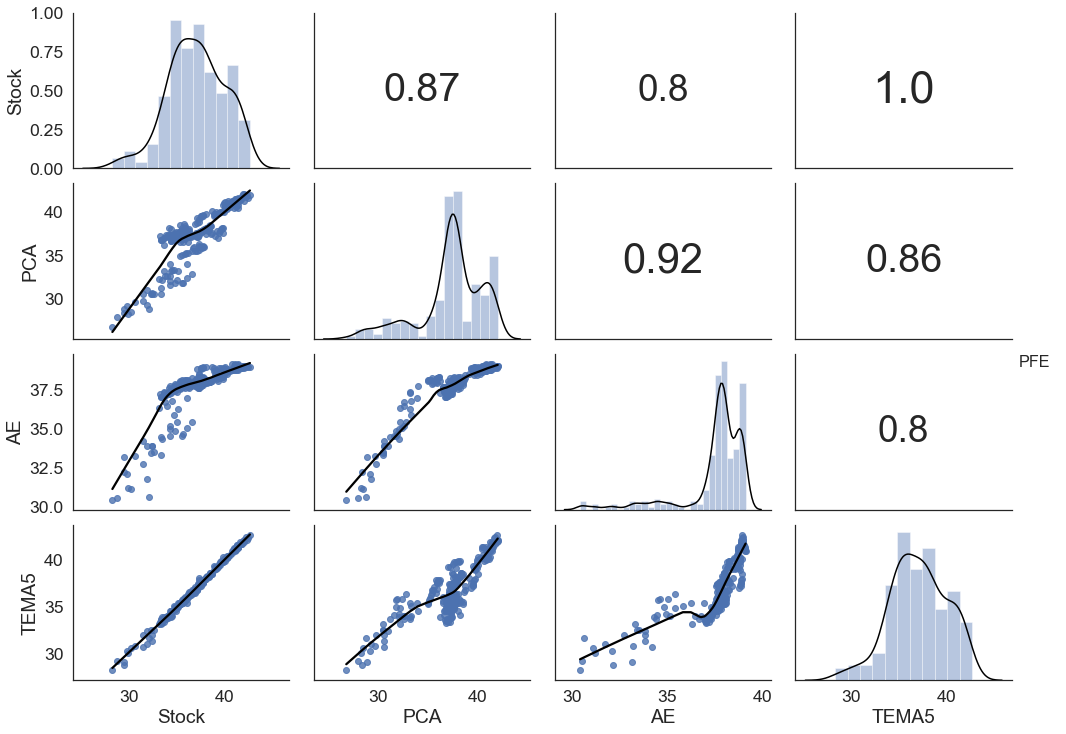

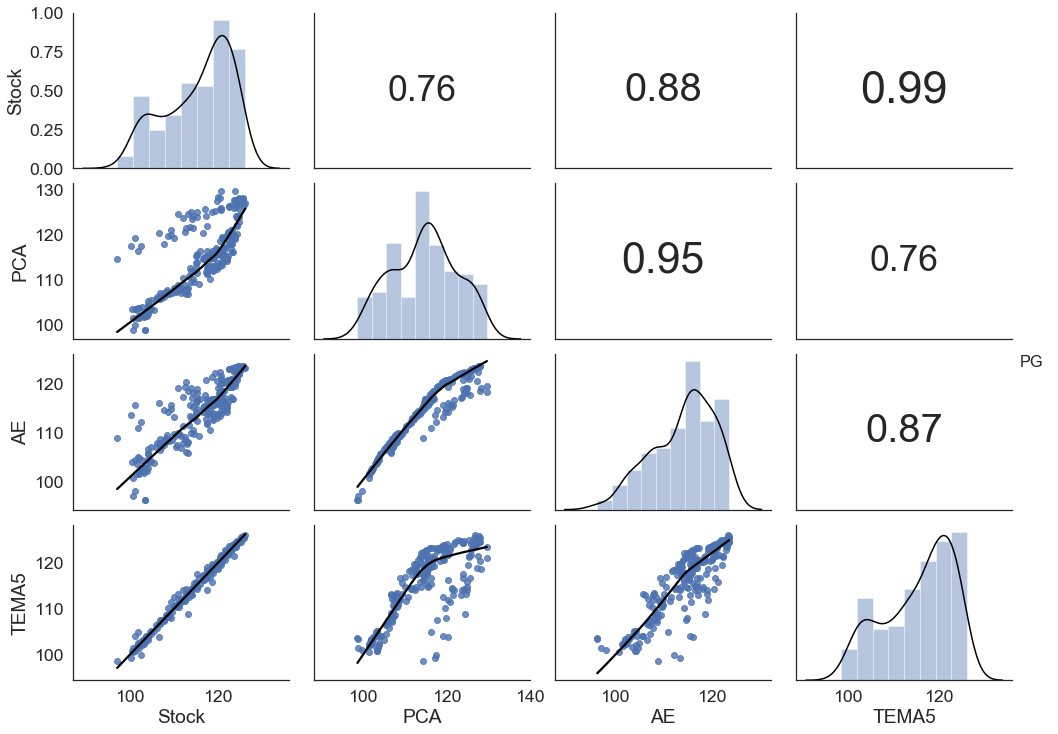

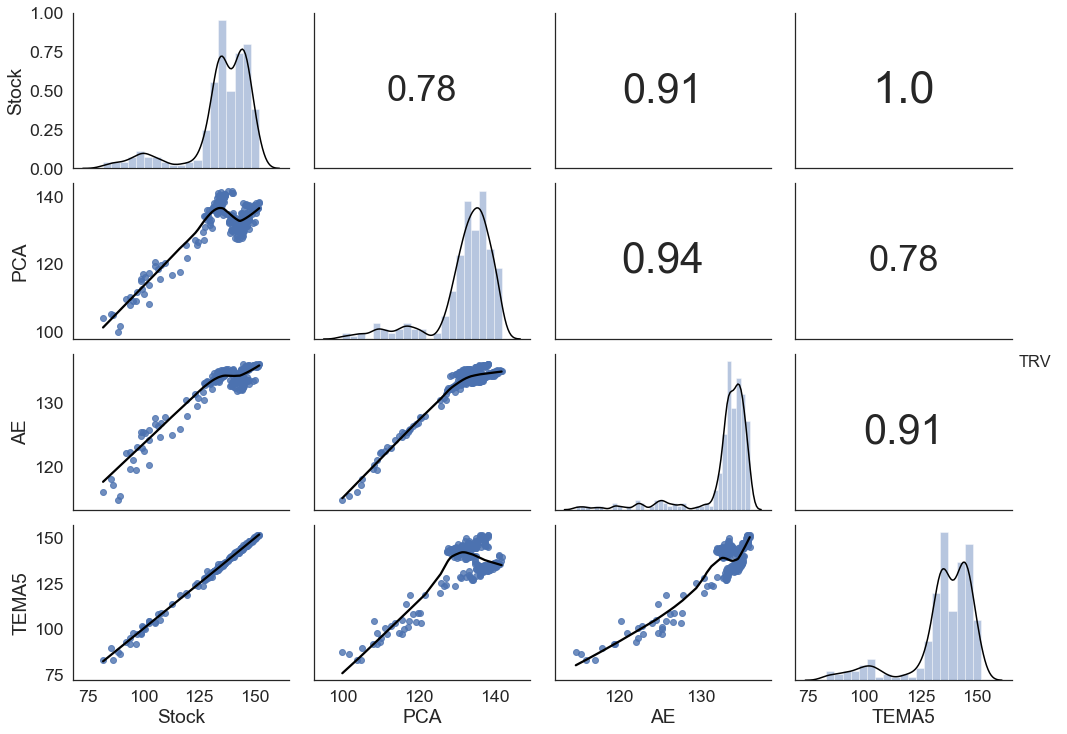

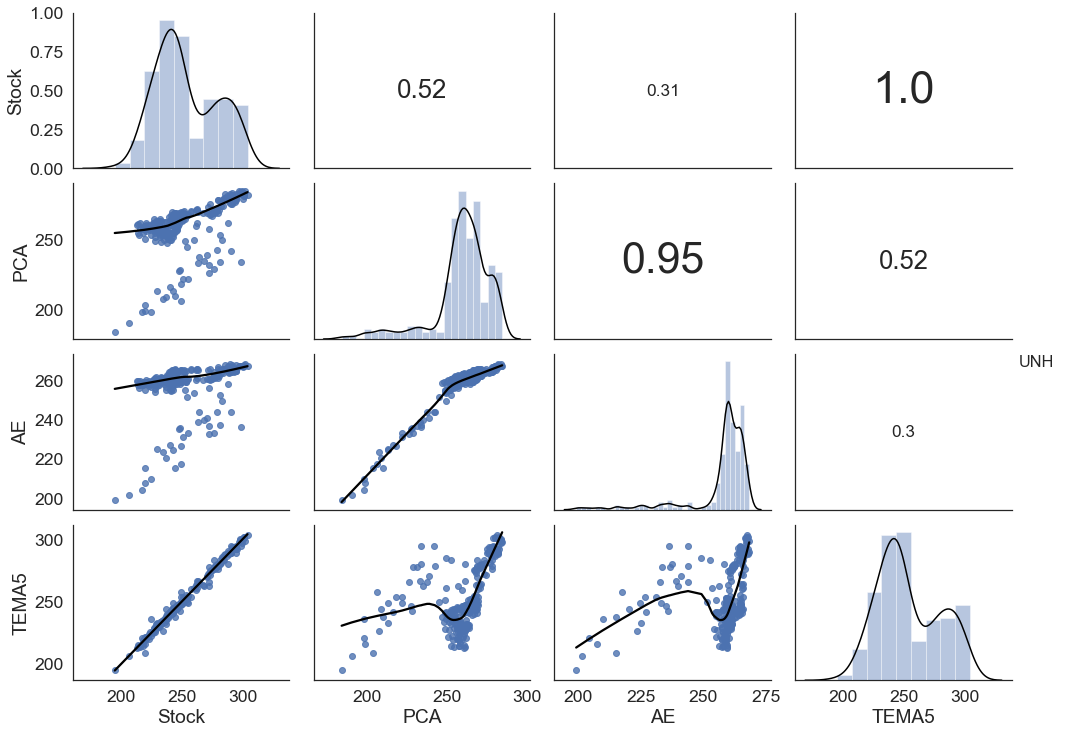

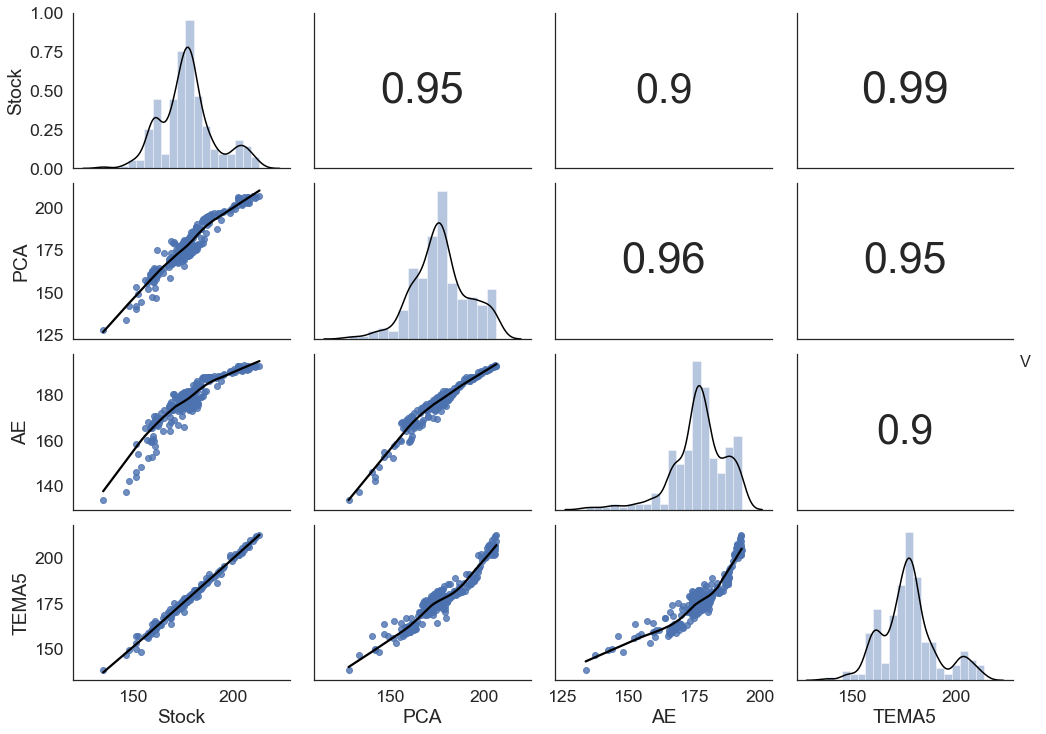

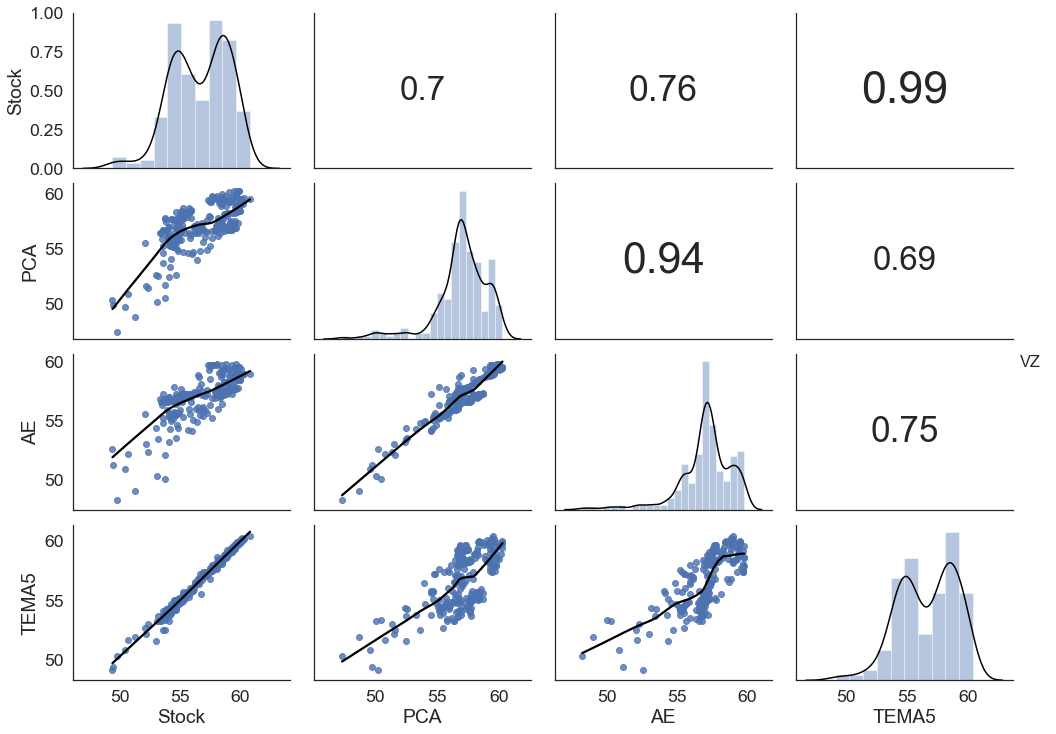

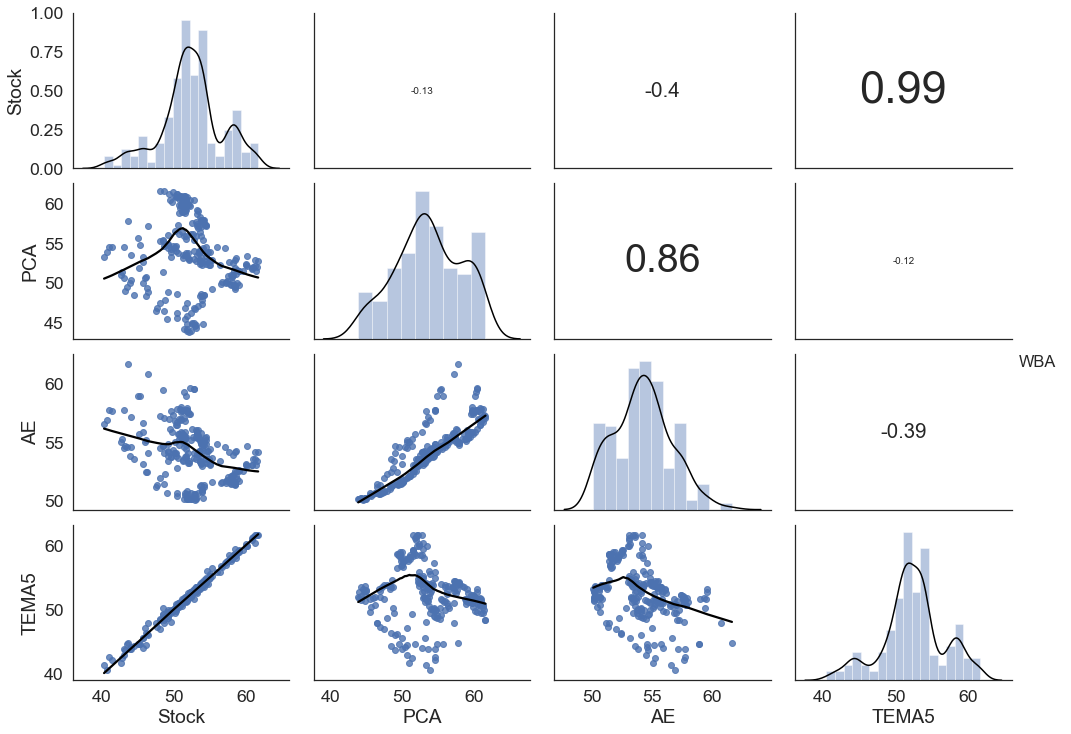

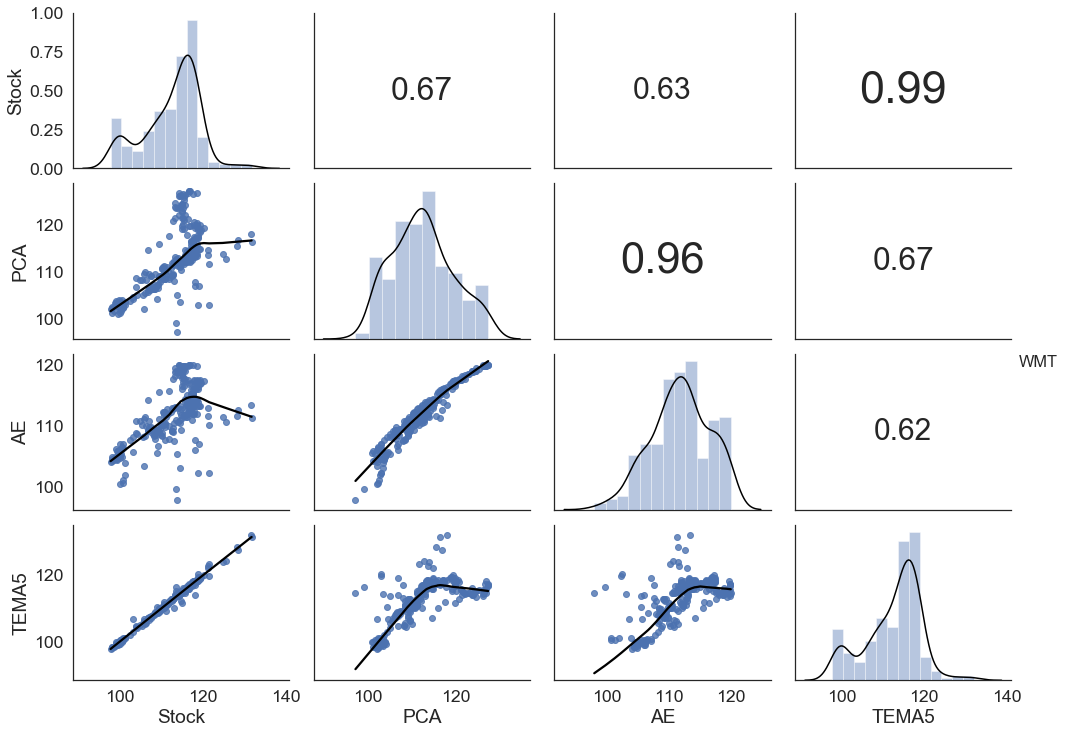

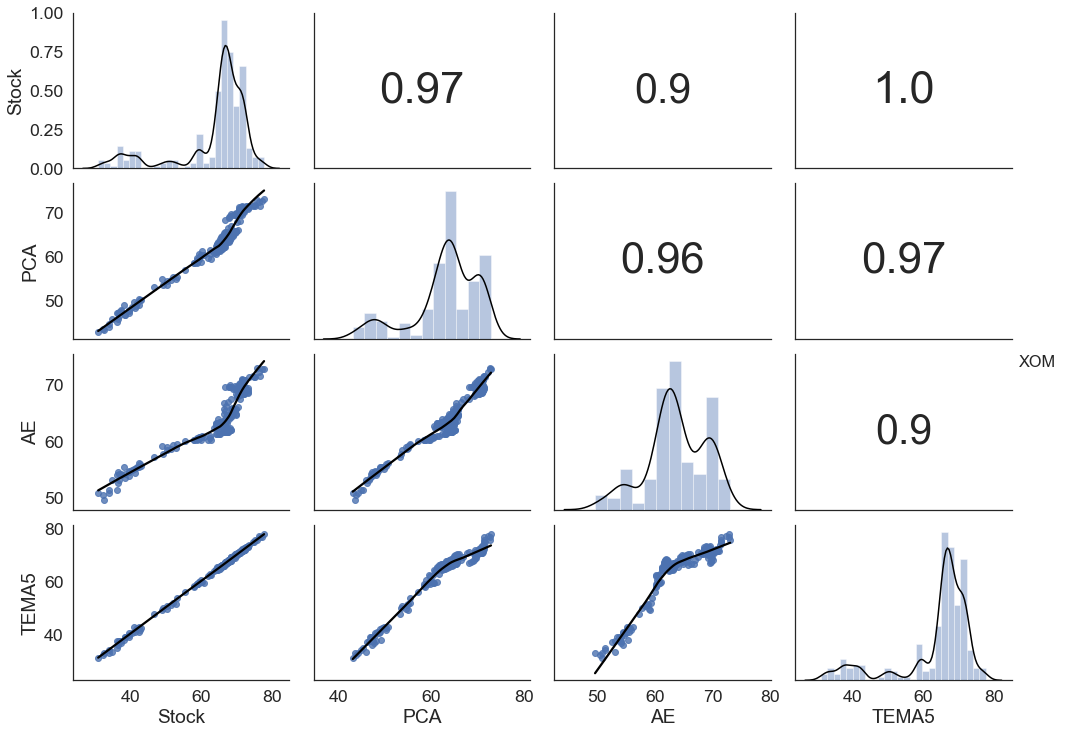

In [12]:
## Correlations 

def corr(x, y, **kwargs): 
    # Calculate the value 
    coef = np.corrcoef(x, y)[0][1] 
    # Make the label 
    label = str(round(coef, 2)) 
    ax = plt.gca() 
    # Add the label to the plot 
    font_size = abs(coef) * 40 + 5 
    ax.annotate(label, [.5, .5,], xycoords=ax.transAxes, 
                ha='center', va='center', fontsize=font_size)

for stk in range(28): 
    df = pd.DataFrame({'Stock': X_actual[: ,stk], 
                       'PCA': PCA_Pred[:, stk], 
                       'AE': AE_Pred[:, stk], 
                       'TEMA5': TEMA5[:, stk]
                      }) 
    sns.set(style='white', font_scale=1.6,)
    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False) 
    g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
    g.map_diag(sns.distplot, kde_kws={'color': 'black'}) 
    g.map_upper(corr)# dot(g.data, kde_kws={'color': 'black'})
    g.add_legend(title = assets[stk])
    plt.savefig('Chart/' + '' + assets[stk] + '_corr.png', bbox_inches='tight') 

Best Prediction Method ==>Triple Exponential Moving Average (5 Days)


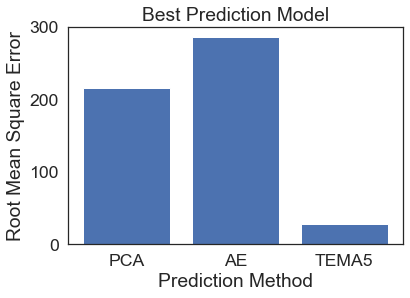

In [13]:
rms_pca = 0
rms_AE = 0
rms_TEMA5 = 0

for stk in range(28): 
    df = pd.DataFrame({'Stock': X_actual[: ,stk], 
                       'PCA': PCA_Pred[:, stk], 
                       'AE': AE_Pred[:, stk], 
                       'TEMA5': TEMA5[:, stk]
                      }) 
    
    rms_pca_1 =np.sqrt(np.mean(np.power((np.array(df['Stock'])-np.array(df['PCA'])),2)))
    rms_AE_1 = np.sqrt(np.mean(np.power((np.array(df['Stock'])-np.array(df['AE'])),2)))
    rms_TEMA5_1 = np.sqrt(np.mean(np.power((np.array(df['Stock'])-np.array(df['TEMA5'])),2)))
    
    rms_pca = rms_pca + rms_pca_1
    rms_AE = rms_AE + rms_AE_1
    rms_TEMA5 = rms_TEMA5 + rms_TEMA5_1

rms = [rms_pca, rms_AE, rms_TEMA5]

sample = np.arange(3)
plt.bar(sample,rms)
plt.xticks(sample, ['PCA', 'AE', 'TEMA5'])
plt.ylabel('Root Mean Square Error')
plt.xlabel('Prediction Method')
plt.title("Best Prediction Model")

print('Best Prediction Method ==>Triple Exponential Moving Average (5 Days)')